# Exercício 6 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9531366229057312, 2.5173532987905863e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SixthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2         3
0  0.126821  0.632137  0.417176 -0.404622
1 -0.957063  0.999996  0.984580  0.860499
2  0.768318  0.999999 -0.694455  0.557814
3 -0.945421  0.997646 -0.406144  0.523482
4 -0.312215  0.998544  0.918215 -0.754007


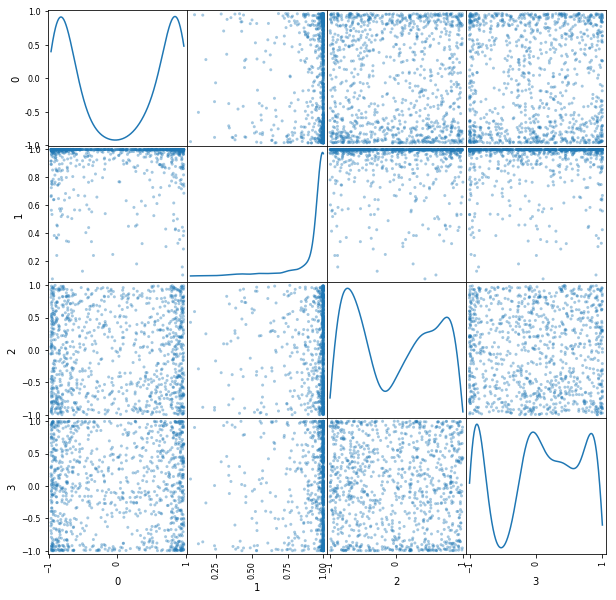

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.508,0.8636,1.341e-28
1,1.4618,5.1729,0.4977,0
2,0,0.7039,0.9293,2.6022e-21
3,0,1.1791,0.9339,1.2713e-20


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.08901047706604004 seconds


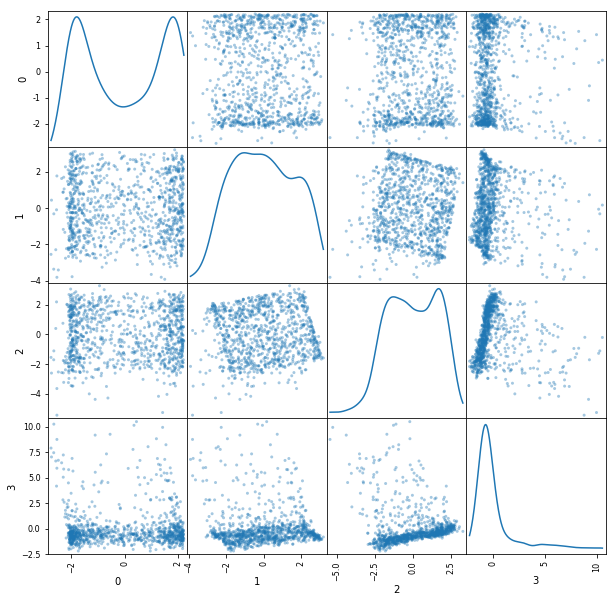

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.3725,0.8792,3.6265e-27
1,0,0.5645,0.9728,9.4371e-13
2,0,0.3253,0.9706,2.3594e-13
3,0.6568,2.6159,0.6726,4.3779e-40


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


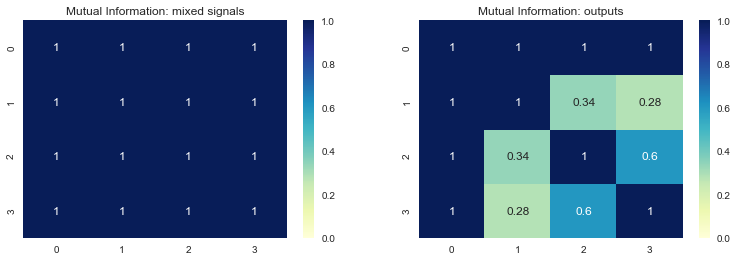

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1,runs  = 1) 

Execution time: 0.1340160369873047 seconds


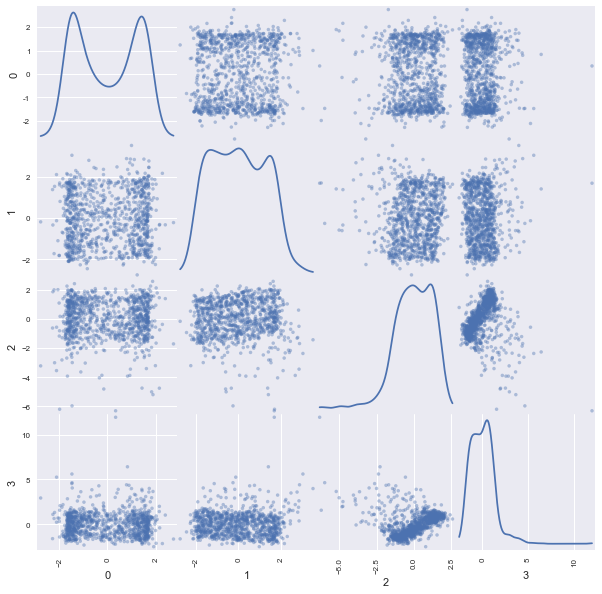

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.3893,0.9012,7.134e-25
1,0,0.2355,0.967,2.8007e-14
2,0.3022,1.4244,0.951,9.6103e-18
3,0.5534,14.8189,0.9186,8.8473e-23


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


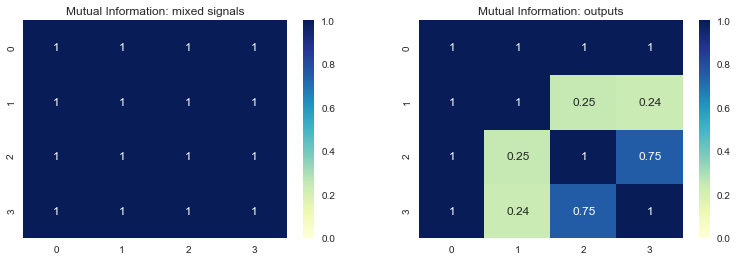

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.07950973510742188 seconds


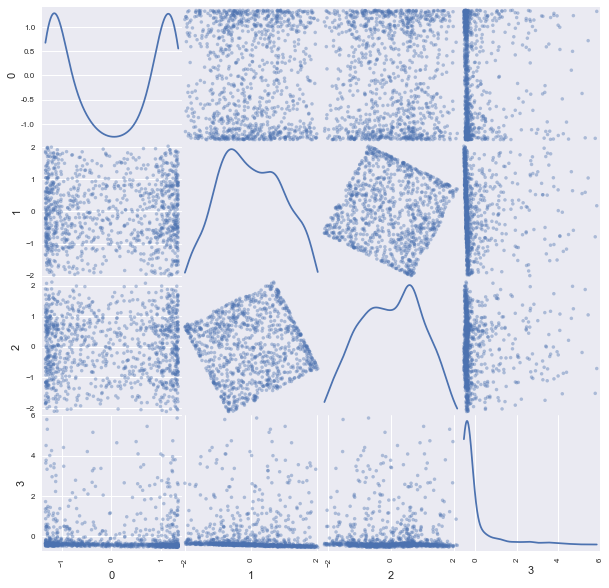

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,2.0355,0.8636,1.3355e-28
1,0,0.3262,0.9783,4.6098e-11
2,0,0.3615,0.9798,1.4756e-10
3,1.3382,13.4797,0.5256,1.4013e-45


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


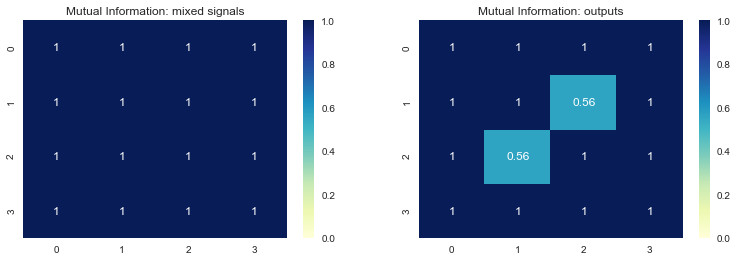

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)